In [2]:
# Import necessary libraries
import pandas as pd
import streamlit as st
import plotly.express as px

# Load the financial data
data = pd.read_csv('financials.csv')

# Remove leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Sidebar widgets
st.sidebar.header('Filter Data')
selected_products = st.sidebar.multiselect('Select Products:', data['Product'].unique())
selected_segments = st.sidebar.multiselect('Select Segments:', data['Segment'].unique())
selected_year_range = st.sidebar.slider('Select Year Range:', data['Year'].min(), data['Year'].max(), (data['Year'].min(), data['Year'].max()))

# Use the selected products, segments, and year range to filter data
filtered_data = data[(data['Product'].isin(selected_products)) & 
                     (data['Segment'].isin(selected_segments)) & 
                     (data['Year'] >= selected_year_range[0]) & 
                     (data['Year'] <= selected_year_range[1])]

# Set background color using HTML styling
background_color = """
    <style>
        body {
            background-color: #f0f0f0;  /* Set your desired background color */
        }
    </style>
"""
st.markdown(background_color, unsafe_allow_html=True) 

# Dashboard title
if selected_products or selected_segments or selected_year_range:
    title_text = 'Financial Analysis'
    if selected_products:
        title_text += f' - Products: {", ".join(selected_products)}'
    if selected_segments:
        title_text += f' - Segments: {", ".join(selected_segments)}'
    if selected_year_range:
        title_text += f' - Year Range: {selected_year_range[0]} to {selected_year_range[1]}'
    st.title(title_text)
else:
    st.title('Financial Analysis')

# Group by 'Month Number' and aggregate sales
aggregated_data = filtered_data.groupby('Month Number')['Sales'].sum().reset_index()

# Line chart with aggregated data
st.header('Total Revenue Over Time')
fig1 = px.line(aggregated_data, x='Month Number', y='Sales', title='Total Revenue Over Time')
st.plotly_chart(fig1)

st.header('Profit vs. Revenue')
fig3 = px.scatter(filtered_data, x='Sales', y='Profit')
st.plotly_chart(fig3)

st.header('Revenue Distribution by Product')
fig4 = px.box(filtered_data, x='Product', y='Sales')
st.plotly_chart(fig4)

st.header('Country Wise Profit Distribution')
fig5 = px.pie(filtered_data, values='Profit', names='Country', title='Country Wise Profit Distribution')
st.plotly_chart(fig5)

# Histogram for Cost Distribution with black boundaries
st.header('Cost Distribution')
fig6 = px.histogram(filtered_data, x='COGS', nbins=30, title='Cost Distribution', 
                    opacity=0.7, # Set the opacity of bars
                    barmode='overlay', # Overlay histograms
                    barnorm='percent', # Normalize to percentage
                    histnorm='probability density') # Normalize to probability density

# Update trace to add black boundaries
fig6.update_traces(marker=dict(color='blue', line=dict(color='black', width=1.5)))

st.plotly_chart(fig6)

DeltaGenerator()

**PROJECT REPORT**

In my project report, I aim to comprehensively analyze financial statements, incorporating key variables such as segment, product, units sold, sales, month number, year, and Cost of Goods Sold (COGS). The report includes a dynamic dashboard featuring five distinct charts: Total Revenue Over Time (depicted through a Line Chart), Profit vs. Revenue (illustrated using a Scatter Plot), Revenue Distribution by Product (represented by a Box Plot), Country Wise Profit Distribution (visualized through a Pie Chart), and Cost Distribution (presented as a Histogram with Black Boundaries). 
My dashboard incorporates a slicer, and the analysis has been conducted based on the filtered data using the following criteria.                                                                                                            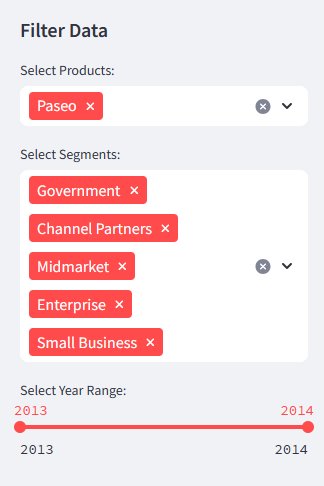

### 
**1** 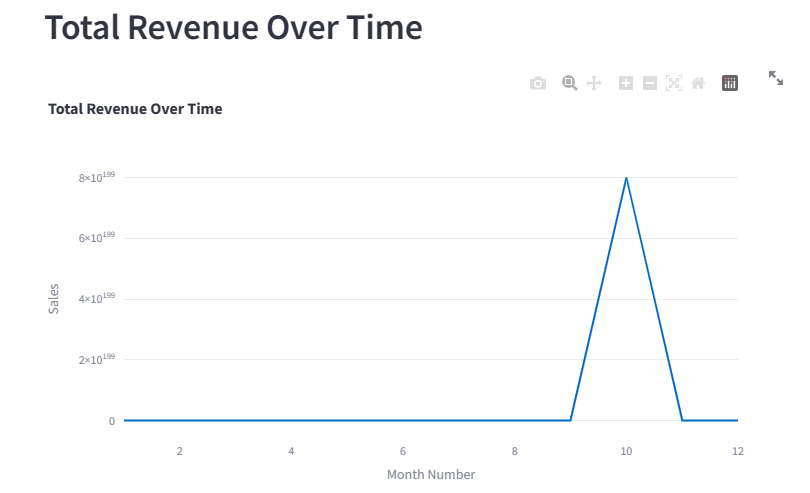

**OBJECTIVE** 

To visualize the aggregated total revenue over different months. The line chart helps in understanding the overall trend in total revenue across the selected products, segments, and year range. It provides insights into seasonal variations or trends over time.

**OBSERVATIONS**

Total revenue for Paseo remained constant at 0 for the first 9 months of the combined 2013-2014 timeframe. This suggests minimal sales of the product during this period. A notable upward trend begins in month 10, leading to a peak revenue value. This significant rise needs further exploration. Following the peak, revenue decreases in month 11 and becomes steady afterwards. This indicates a temporary surge followed by potential market saturation or competition.

**ANALYSIS**

The initiation of Paseo, evident in the tenth month, marks a significant event potentially responsible for the upsurge in revenue. The launch likely generated initial excitement and heightened demand, resulting in the observed peak. Another plausible explanation could be associated with seasonal demand, particularly if Paseo caters to a product or service with heightened relevance during specific seasons, such as air conditioners during the summer months. Alternatively, targeted promotions or marketing campaigns strategically deployed around the tenth month might have contributed to a temporary surge in sales. Furthermore, external factors such as economic events, competitor actions, or prevailing industry trends could have exerted an influential impact on the demand dynamics surrounding Paseo during this period. The confluence of these factors underscores the complexity of the observed revenue peak in month 10, necessitating a multifaceted analysis for a comprehensive understanding.

**MANAGERIAL IMPLICATIONS**

1. **Strategic Product Launch Considerations:**
   - The observation of Paseo's revenue surge following its initiation in month 10 suggests that strategic product launches can have a substantial impact on sales. Managers should consider carefully timing and planning launches to capitalize on potential market excitement and demand.

2. **Seasonal Product Strategy:**
   - Recognizing the apparent seasonal demand for Paseo, especially given the flat revenue during the preceding months, management could develop a seasonal product strategy. Aligning marketing efforts and inventory management with peak seasons might enhance overall sales performance.

3. **Optimizing Marketing Campaigns:**
   - The analysis proposes that targeted promotions or marketing campaigns around month 10 could have influenced the observed surge. Managers should evaluate the effectiveness of such campaigns and consider replicating successful strategies during similar periods.

4. **Market Saturation Awareness:**
   - The decline in revenue post the peak in month 10 may indicate market saturation or heightened competition. Managers need to monitor market dynamics closely and be prepared to adapt strategies to sustain growth or explore new market segments.

5. **Flexibility in Response to External Factors:**
   - External factors like economic events, competitor actions, or industry trends can significantly impact product demand. Managers should maintain flexibility in their approach, staying informed about industry developments and promptly adjusting strategies to align with external changes.

6. **Continuous Performance Monitoring:**
   - Given the complexity of the factors contributing to the revenue peak, continuous performance monitoring is essential. Implementing robust analytics and KPI tracking will enable managers to quickly identify shifts in market dynamics and respond proactively to maintain a competitive edge.

In conclusion, the managerial implications emphasize the importance of strategic planning, season-sensitive approaches, effective marketing, adaptability to external influences, and ongoing performance monitoring. Managers can leverage these insights to refine existing strategies, make informed decisions, and ensure sustained success in a dynamic market environment.


**2** 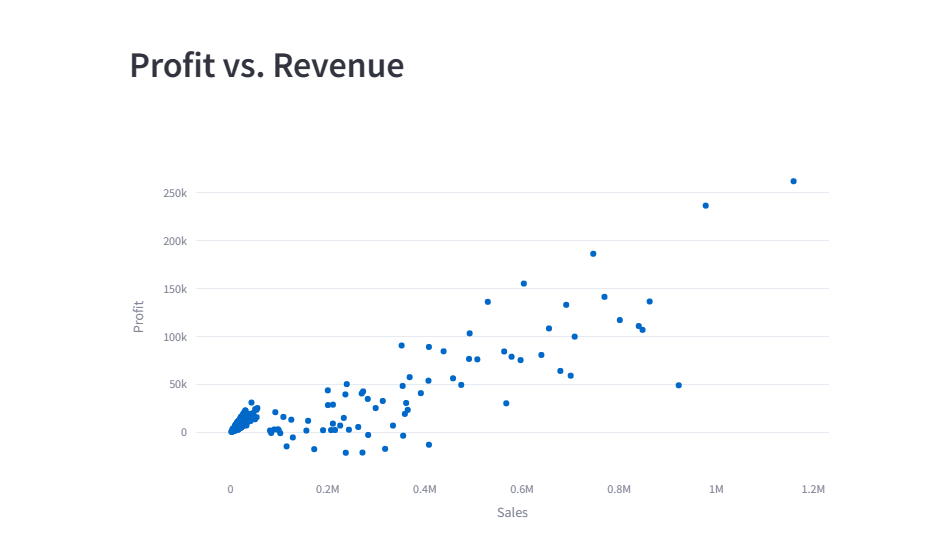

**OBJECTIVE**

To explore the relationship between profit and sales. The scatter plot shows how profit and revenue are distributed. It allows identification of patterns or outliers in the data, providing insights into the correlation between profitability and sales.

**OBSERVATION**

The dataset exhibits a notable clustering phenomenon, notably concentrated around the 0.2 million mark in sales and within the profit range of 0 to 50k, affirming a substantial density of observations in this particular region. Within this cluster, a discernible positive trend unfolds, revealing a gradual yet consistent increase in profit values as sales ascend from the lower boundary of the cluster towards the 0.2 million sales threshold. Despite the predominant clustering, the dataset presents scattered data points dispersed across various sales and profit levels. Above the main cluster, certain data points indicate the potential for higher profits associated with specific sales values. Conversely, below the cluster, a few scattered points suggest instances of sales leading to either losses or significantly diminished profits. This scattering beyond the primary cluster adds a layer of complexity to the overall distribution, necessitating a closer examination of these outliers and their potential impact on the observed trends and patterns within the dataset.

**ANALYSIS**

In the realm of cluster analysis, where a significant portion of data points converges, conducting a more in-depth investigation is imperative. A recommended approach involves computing the average profit corresponding to 0.2 million in sales. Delving further, an examination of the range and distribution of profits within this sales bracket becomes essential, aiming to unveil potential sub-clusters within the overarching cluster. This nuanced exploration promises a deeper comprehension of the typical profit dynamics associated with the prevalent sales volume. 
Simultaneously, a meticulous trend analysis within the identified cluster holds significance. Employing statistical methods, one can quantify the strength and direction of the relationship between sales and profit, deciphering whether the observed upward trend persists or levels off for higher sales values. This analytical pursuit offers valuable insights into the underlying dynamics and potential patterns within the identified cluster. A gentle upward trend suggests increasing profitability with rising sales within this range. Analyzing the outliers, comparing trends across different sales ranges, and considering the specific context of your data will provide a more comprehensive understanding of this relationship and its implications for your business.


**MANAGERIAL IMPLICATIONS**

1. **Targeted Profit Optimization:** Focus efforts on the $0.2 million sales volume, where a notable clustering of data points occurs. Calculate the average profit for this specific sales bracket to establish a baseline for performance evaluation and set realistic profit expectations.

2. **Strategic Interventions:** Leverage the positive trend observed within the cluster to develop and implement strategies that capitalize on the positive correlation between sales and profit. Monitor whether this trend sustains or plateaus for higher sales values, guiding long-term planning and resource allocation.

3. **Sub-cluster Identification:** Conduct a nuanced exploration within the $0.2 million sales bracket to unveil potential sub-clusters. This deeper understanding of the typical profit dynamics associated with prevalent sales volumes allows for targeted strategies to maximize profitability in specific scenarios.

4. **Optimization of Product Offerings:** Explore opportunities presented by scattered data points above the main cluster, indicating potential for higher profits associated with specific sales values. Optimize product offerings, pricing strategies, or targeted marketing campaigns to capitalize on these identified opportunities.

5. **Cost Structure Analysis:** Investigate points below the cluster suggesting losses or diminished profits at various sales levels. Conduct a thorough analysis of cost structures and operational efficiencies to rectify issues affecting profitability and ensure sustainable financial performance.

6. **Long-term Strategic Planning:** Use insights from the analysis to inform long-term strategic planning. Adapt business strategies based on the observed trends, outliers, and comparative assessments to optimize financial performance and drive strategic business success.

**3** 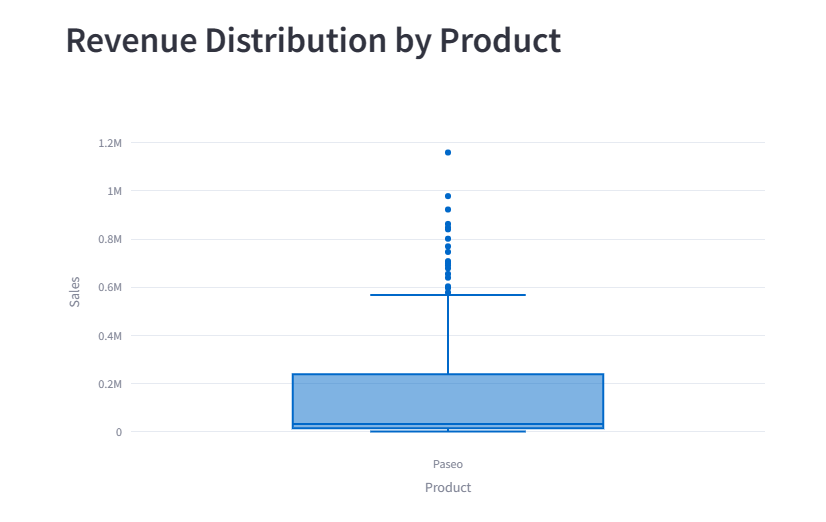

**OBJECTIVE**

To compare the distribution of sales across different products. The box plot provides a summary of the sales distribution for each product, including median, quartiles, and potential outliers. It helps in comparing the performance of different products.

**OBSERVATION**

Paseo's sales distribution is characterized by a median value of 32.419K, indicating a moderate typical sales level for the company. The Interquartile Range (IQR), spanning from 15.621K to 239.183K, reveals a substantial spread in the middle 50% of the sales data. This wide variability suggests significant fluctuations in Paseo's sales performance, with certain periods or transactions yielding considerably higher sales than others. Notably, the presence of potential outliers, represented by the minimum sales value of 1655 and the maximum sales value of 1.1592M, falls far outside the IQR. These extreme values signal instances of both unusually low and high sales for Paseo, prompting a need for in-depth investigation to uncover the factors influencing such extremes and their implications for the company's overall sales dynamics.

**ANALYSIS**

Paseo's sales exhibit notable variability, as evidenced by the wide Interquartile Range (IQR) and the presence of outliers. This variability implies that the company's sales performance is characterized by unpredictability, with the potential for experiencing both exceptionally high and low periods. Unraveling the factors contributing to this variability is essential for effective sales forecasting and strategic planning. Several potential factors, including seasonal fluctuations, irregular promotional activities, supply chain disruptions, customer-specific deals, and regional sales variations, could contribute to the observed patterns. Furthermore, a detailed analysis of sales patterns within different segments may unveil additional insights, shedding light on factors such as customer preferences or market competition that could impact sales variability. While the high variability introduces challenges in planning, it also presents opportunities for significant growth if the underlying factors driving high sales can be identified and strategically leveraged. This dual nature of risk and opportunity underscores the importance of a nuanced understanding of Paseo's sales dynamics for informed decision-making and proactive management.

**MANAGERIAL IMPLICATIONS**

1. **Strategic Planning for Variability:**
   - Recognize the unpredictability in sales and develop flexible strategic plans that can adapt to fluctuations.
   - Establish contingency measures to mitigate the impact of both unusually low and high sales periods.

2. **Segment-Specific Strategies:**
   - Analyze sales patterns within different segments to identify segment-specific drivers of variability.
   - Tailor marketing, promotional, and supply chain strategies based on the unique dynamics of each product segment.

3. **Optimizing Seasonal Opportunities:**
   - Leverage insights into seasonal fluctuations to optimize sales during peak demand periods.
   - Implement targeted marketing campaigns and promotions aligned with seasonal trends.

4. **Customer-Centric Approaches:**
   - Tailor promotional activities and deals based on specific customer preferences and behavior.
   - Foster customer loyalty through personalized strategies to mitigate the impact of sales variability.

5. **Risk Mitigation and Opportunity Capitalization:**
   - Establish a risk management framework to identify, assess, and mitigate potential risks associated with sales variability.
   - Capitalize on opportunities presented by high sales periods, exploring avenues for sustainable growth and market expansion.

6. **Continuous Monitoring and Adaptation:**
   - Implement robust monitoring mechanisms to track sales patterns continuously.
   - Adapt strategies based on real-time data and market dynamics to stay agile in response to changing conditions.

7. **Collaboration and Communication:**
   - Foster collaboration between sales, marketing, and supply chain teams to align efforts in response to sales dynamics.
   - Maintain transparent communication across departments to ensure a coordinated approach to variability challenges.

8. **Data-Driven Decision-Making:**
    - Utilize data analytics and business intelligence tools for informed decision-making.
    - Base strategies on comprehensive data insights to enhance the precision and effectiveness of sales-related decisions.

By incorporating these managerial implications, Paseo can navigate the complexities of sales variability, minimize risks, capitalize on opportunities, and foster a more resilient and adaptive business model.

**4** 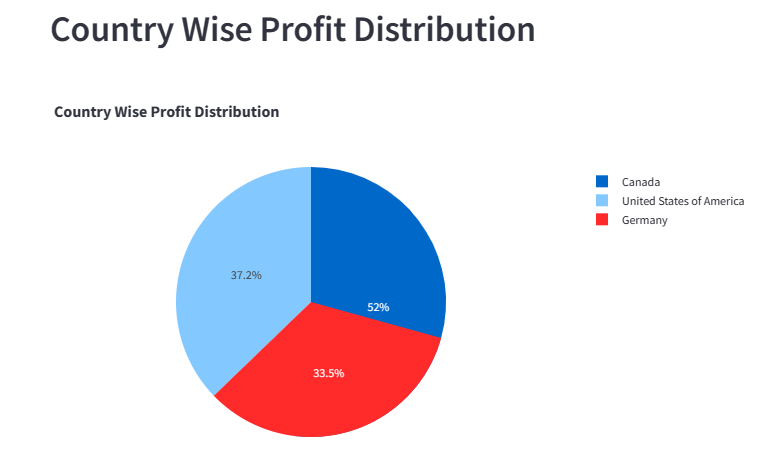

**OBJECTIVE**

To understand the distribution of profit across different countries. The pie chart visualizes the proportion of total profit contributed by each country. It offers insights into the geographical impact on profits and helps in identifying key contributors.

**OBSERVATIONS**

Canada emerges as the predominant contributor to Paseo's profit, commanding a substantial share of 52%, underscoring its pivotal role in shaping the overall profitability landscape. Following closely, Germany establishes itself as a secondary but significant contributor, holding a commendable 33.5% share. In contrast, the United States of America contributes the remaining 14.5%, reflecting a comparatively smaller role in Paseo's profit structure when juxtaposed against the dominant shares claimed by Canada and Germany. This distribution highlights the varying degrees of influence each country exerts on Paseo's profitability, emphasizing the strategic importance of Canada and Germany in particular.

**ANALYSIS**

The noteworthy concentration of profits in Canada and Germany signals a strategic emphasis on these markets by Paseo. This concentration prompts a critical examination to uncover the underlying factors driving success in these regions, whether it be due to favorable market conditions, effective marketing strategies, or well-established distribution channels. The significance of the US, albeit with a smaller share, warrants careful consideration. Conducting a thorough analysis can unveil growth potential in this market, guiding targeted efforts or adjustments to existing strategies for optimized outcomes.

However, the heavy reliance on Canada and Germany raises considerations about potential risks associated with over-dependence on specific regions. In the event of unforeseen economic or market changes in these concentrated areas, the business might face vulnerabilities. Therefore, there arises a strategic imperative to explore avenues for diversification, either into other countries or segments, as a prudent approach for long-term stability and sustained growth. This proactive measure ensures a more resilient and adaptable business model, reducing susceptibility to external uncertainties.

**MANAGERIAL IMPLICATIONS**

1. **Strategic Focus on Canada and Germany:** Given the dominant contribution of Canada and Germany to Paseo's profitability, there is a strategic imperative to maintain and enhance efforts in these markets. Understanding the factors that drive success in these regions, such as market conditions and effective strategies, can guide focused initiatives to sustain and potentially expand market share.

2. **US Market Potential:** While the US holds a smaller share, its sizable contribution indicates a notable market presence. Managers should conduct a comprehensive analysis to identify growth opportunities in the US market. Tailoring strategies or implementing adjustments based on this analysis can unlock untapped potential and contribute to overall business growth.

3. **Diversification Strategy:** Heavy reliance on specific countries, particularly Canada and Germany, poses inherent risks. Managers should consider diversification strategies to mitigate vulnerabilities associated with concentrated markets. Exploring new countries or segments can provide a safety net against unforeseen economic or market changes, ensuring long-term stability.

4. **Adaptability and Resilience:** The business should prioritize adaptability and resilience in its strategic approach. Proactive measures, such as diversification and a keen understanding of market dynamics, enhance the company's ability to navigate uncertainties. This approach establishes a more resilient business model capable of withstanding external shocks.

5. **Continuous Market Monitoring:** Regular monitoring of market conditions, consumer behaviors, and competitive landscapes is essential. Managers should stay abreast of changes in the countries where Paseo operates to make informed and timely decisions. This continuous market monitoring enables the company to respond effectively to evolving circumstances.

6. **Investment in Marketing and Distribution Channels:** Understanding the success factors in key markets involves investing in effective marketing strategies and optimizing distribution channels. Managers should allocate resources strategically to maintain and strengthen Paseo's market position in Canada, Germany, and other targeted regions.

7. **Risk Mitigation:** Developing contingency plans and risk mitigation strategies is crucial. Anticipating potential challenges associated with market concentration allows the company to proactively address and minimize risks. This forward-looking approach enhances the overall risk management framework.

8. **Long-Term Growth Planning:** Managers should engage in long-term growth planning that goes beyond immediate profitability. This involves a holistic view of the market landscape, identifying emerging trends, and positioning the company for sustained growth. Strategic decisions should align with the overarching goal of long-term business success.

**5** 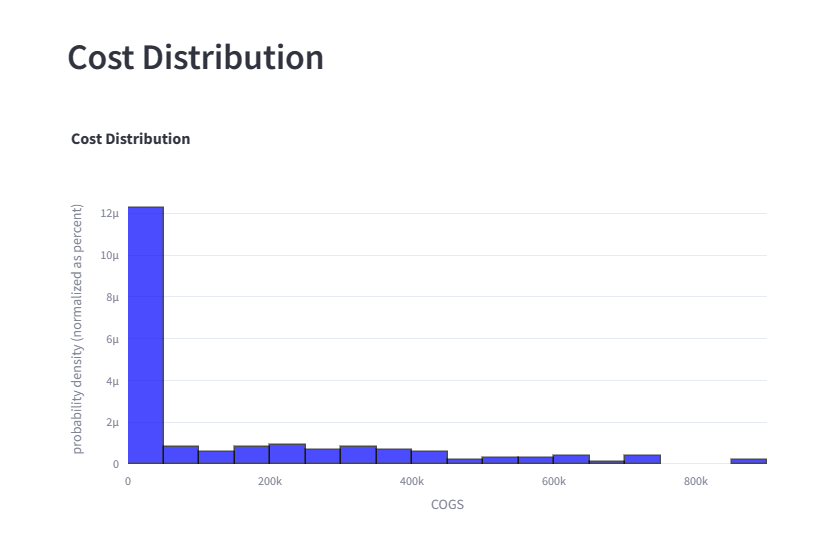

**OBJECTIVE**

To analyze the distribution of Cost of Goods Sold (COGS).The histogram shows how costs are distributed, with the black boundaries enhancing visibility. It helps in identifying the concentration of costs within specific ranges and provides insights into cost patterns.

**OBSERVATIONS**

The histogram vividly illustrates a pronounced concentration of Cost of Goods Sold (COGS) in the range of 0 to 200k, as evidenced by a strong peak in probability density. This concentration signifies that a significant majority of Paseo's production costs for the selected segments are incurred below the 200k threshold. However, the graph's right side, spanning from 200k to 800k, reveals a long tail with a notably lower probability density. This implies that, although less frequent, instances of COGS within this higher cost range still occur.

The utilization of black boundaries in the graph effectively delineates the primary distribution, accentuating the concentration of costs within the 0-200k range and distinguishing it from the less frequent occurrences of higher cost values. This visual enhancement facilitates a clear understanding of the cost distribution pattern and the prevalence of higher costs, providing valuable insights into Paseo's production cost dynamics for the specified segments.

**ANALYSIS**

Cost Efficiency Insight: The pronounced concentration of Cost of Goods Sold (COGS) at the lower end signals Paseo's potential for cost efficiency within the selected segments. Successfully producing the majority of units with costs below 200k indicates effective sourcing, streamlined production processes, or other impactful cost-saving strategies.

Outliers Exploration: The elongated tail towards higher costs prompts a deeper investigation. A detailed analysis of instances incurring COGS above 200k can unveil outliers attributed to factors such as material variations, unique product configurations, or unforeseen production challenges. Understanding these specific reasons is crucial for mitigating such occurrences and maintaining overall cost efficiency.

Strategic Cost Management: The observed distribution offers valuable insights for formulating and implementing cost management strategies. A strategic focus on maintaining or reducing the peak density around 0-200k through continuous improvement initiatives, while concurrently minimizing instances of higher costs, becomes pivotal for securing Paseo's long-term profitability. This strategic approach ensures a balanced cost structure, enhancing the company's competitiveness and sustainability in the market.

**MANAGERIAL IMPLICATIONS**

1. **Cost Efficiency Optimization:** The concentration of Cost of Goods Sold (COGS) within the 0-200k range highlights Paseo's potential for cost efficiency in the specified segments. Managers should continue to focus on optimizing costs through effective sourcing, production streamlining, and ongoing efficiency improvement initiatives.

2. **Outlier Mitigation Strategies:** The analysis of instances incurring COGS above 200k reveals potential outliers linked to material variations, unique product configurations, or unforeseen production challenges. Managers should develop strategies to mitigate these outliers, possibly through better inventory management, standardized production processes, or proactive issue identification and resolution.

3. **Continuous Improvement:** The pronounced peak in the lower cost range indicates success in cost-effective production. Management should encourage and invest in continuous improvement efforts to maintain or further reduce costs in this range. Regular evaluations of production processes and technology upgrades may contribute to sustained cost efficiency.

4. **Strategic Cost Management:** The long tail of higher costs suggests the need for strategic cost management. Managers should formulate strategies to address and minimize instances of higher costs, ensuring a balanced cost structure. This may involve negotiating favorable contracts with suppliers, exploring alternative sourcing options, or investing in technologies that enhance efficiency in the higher-cost production scenarios.

5. **Market Competitiveness:** Maintaining cost efficiency, particularly within the predominant 0-200k range, enhances Paseo's competitiveness in the market. By strategically managing costs, the company can offer competitive pricing, potentially gaining a market advantage over competitors. This becomes crucial for long-term sustainability and profitability.

6. **Risk Mitigation through Diversification:** Considering the concentration of costs in specific ranges, managers should assess the risks associated with over-reliance on particular suppliers or materials. Exploring diversification in sourcing and production inputs can mitigate risks associated with potential fluctuations or disruptions in the supply chain.

7. **Investment in Technology:** To support continuous improvement and cost management strategies, investment in advanced technologies and automation may be beneficial. This can lead to increased efficiency, reduced production costs, and improved overall competitiveness.

8. **Regular Monitoring and Adaptation:** Given the dynamic nature of business environments, regular monitoring of cost patterns and adaptation of strategies is essential. Managers should stay vigilant to changes in market conditions, supplier landscapes, and technological advancements, adjusting their cost management strategies accordingly.